In [7]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [8]:
digits = datasets.load_digits()

In [10]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
digits.data.shape

(1797, 64)

In [13]:
num_examples = len(digits.data)
num_examples

1797

In [15]:
num_split = int(0.7*num_examples)
num_split

1257

In [16]:
train_features = digits.data[:num_split]
train_labels = digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

In [19]:
print("Number of Training Examples : ", len(train_features))
print("Number of Test Examples : ", len(test_features))
print("Total Examples: ", len(train_features) + len(test_features))

Number of Training Examples :  1257
Number of Test Examples :  540
Total Examples:  1797


In [20]:
classifier = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')

In [21]:
classifier.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='brute')

In [22]:
predicted = classifier.predict(test_features)
predicted

array([4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4,
       8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5,
       0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2,
       6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 3, 0, 0,
       1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0,
       5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 1, 8,
       4, 9, 0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9,
       8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 9, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 9, 7, 6, 3,
       2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9,
       6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8,
       9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 1, 9, 0, 1, 2,

In [24]:
distance, neighbors = classifier.kneighbors(test_features)
neighbors

array([[ 353,  817,  297,  366, 1254],
       [1177,  588,  725,  824,  328],
       [ 376,  791,  801,  165,  896],
       ...,
       [ 148,  248,  242, 1069,  255],
       [ 254,  251,  849,  417,  199],
       [ 183,  248, 1015,  513,  224]], dtype=int64)

In [25]:
distance

array([[11.66190379, 16.94107435, 18.16590212, 19.31320792, 20.19900988],
       [21.09502311, 21.47091055, 21.61018278, 21.74856317, 21.81742423],
       [18.02775638, 18.1934054 , 19.62141687, 21.16601049, 21.9317122 ],
       ...,
       [20.83266666, 21.70253441, 22.93468988, 24.0208243 , 25.63201124],
       [19.5192213 , 21.09502311, 23.87467277, 24.69817807, 24.8394847 ],
       [26.73948391, 27.62245463, 27.73084925, 27.80287755, 27.92848009]])

In [27]:
print("Classification report for classfier %s:\n%s\n" 
      %(classifier, metrics.classification_report(test_labels, predicted)))
print("Confusion Matrix:\n%s" % metrics.confusion_matrix(test_labels,predicted))

Classification report for classfier KNeighborsClassifier(algorithm='brute'):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540


Confusion Matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  0

<function matplotlib.pyplot.show(*args, **kw)>

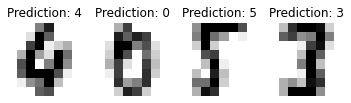

In [30]:
images_and_predictions = list(zip(digits.images[num_split:], predicted))
for index, (image, prediction) in enumerate (images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)        
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
    
plt.show    

In [31]:
clustering = KMeans(n_clusters=10) 

In [32]:
cluster = clustering.fit(train_features)

In [33]:
clustering.cluster_centers_

array([[ 0.00000000e+00,  6.90476190e-01,  8.96031746e+00,
         1.43015873e+01,  1.38015873e+01,  7.03968254e+00,
         6.90476190e-01,  2.77555756e-17,  2.38095238e-02,
         4.44444444e+00,  1.24920635e+01,  8.85714286e+00,
         1.14047619e+01,  1.17857143e+01,  2.03174603e+00,
         1.58730159e-02,  7.93650794e-03,  2.31746032e+00,
         3.60317460e+00,  3.29365079e+00,  1.20476190e+01,
         9.34920635e+00,  8.80952381e-01,  1.38777878e-17,
         5.42101086e-19,  1.03174603e-01,  1.04761905e+00,
         8.34920635e+00,  1.44047619e+01,  6.63492063e+00,
         1.90476190e-01,  2.16840434e-18,  0.00000000e+00,
         8.73015873e-02,  8.01587302e-01,  4.73809524e+00,
         1.16031746e+01,  1.24206349e+01,  2.23809524e+00,
         0.00000000e+00,  5.20417043e-18,  6.50793651e-01,
         1.95238095e+00,  6.03174603e-01,  3.44444444e+00,
         1.26825397e+01,  6.61904762e+00,  0.00000000e+00,
         5.20417043e-18,  1.09523810e+00,  7.34126984e+0

In [34]:
predicted = clustering.predict(test_features)
predicted

array([8, 5, 9, 0, 1, 4, 1, 9, 6, 9, 8, 8, 6, 7, 7, 7, 7, 9, 6, 4, 9, 8,
       3, 3, 8, 4, 5, 3, 4, 3, 5, 2, 7, 0, 8, 4, 1, 6, 3, 4, 5, 3, 7, 0,
       5, 9, 1, 6, 3, 4, 5, 2, 7, 0, 8, 9, 1, 6, 3, 4, 5, 4, 9, 9, 1, 9,
       5, 4, 3, 4, 3, 8, 3, 6, 6, 0, 9, 3, 5, 5, 0, 0, 6, 3, 0, 5, 2, 4,
       1, 0, 0, 6, 0, 0, 8, 1, 1, 1, 8, 4, 3, 4, 5, 4, 1, 7, 3, 0, 5, 5,
       2, 6, 1, 0, 7, 3, 6, 8, 1, 0, 3, 0, 4, 3, 6, 1, 3, 8, 0, 3, 8, 5,
       9, 0, 1, 4, 1, 3, 6, 9, 8, 8, 6, 4, 3, 7, 7, 4, 6, 4, 9, 8, 3, 3,
       8, 4, 5, 3, 5, 2, 7, 0, 8, 9, 1, 6, 4, 4, 5, 2, 7, 0, 8, 4, 1, 6,
       4, 4, 5, 2, 7, 0, 8, 4, 1, 6, 4, 4, 5, 4, 4, 4, 1, 4, 5, 4, 4, 4,
       4, 8, 2, 6, 6, 0, 4, 2, 5, 5, 7, 7, 6, 2, 7, 5, 2, 7, 1, 0, 0, 6,
       0, 0, 8, 1, 1, 1, 8, 4, 2, 4, 5, 4, 9, 7, 4, 7, 5, 5, 2, 6, 1, 0,
       7, 2, 6, 8, 1, 0, 2, 0, 4, 2, 6, 1, 4, 8, 0, 2, 8, 5, 4, 0, 1, 4,
       1, 2, 6, 4, 8, 8, 6, 7, 4, 7, 7, 4, 6, 4, 9, 8, 4, 6, 8, 0, 5, 6,
       4, 4, 5, 3, 7, 0, 8, 9, 2, 3, 3, 2, 5, 3, 4,

In [38]:
print(metrics.classification_report(test_labels,predicted))
print(metrics.confusion_matrix(test_labels,predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        53
           3       0.07      0.09      0.08        53
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        54
           8       0.00      0.00      0.00        52
           9       0.09      0.07      0.08        55

    accuracy                           0.02       540
   macro avg       0.02      0.02      0.02       540
weighted avg       0.02      0.02      0.02       540

[[ 0  0  0  0  0 52  0  0  1  0]
 [ 0  0 17 35  0  0  0  0  0  1]
 [ 7  0  0  0  3  1  0 42  0  0]
 [41  0  0  5  1  0  3  0  0  3]
 [ 0  0  1  0  0  1  2  0 52  1]
 [ 0  1  0  0 19  0  0  0  1 35]
 [ 0 52  1  1  0  0  0  0  0  0]
 [ 0  0  0

In [41]:
print(metrics.completeness_score(test_labels,predicted))
print(metrics.homogeneity_score(test_labels,predicted))
print(metrics.adjusted_mutual_info_score(test_labels,predicted))

0.7436568690340123
0.7315005924029004
0.7280976734760459
